<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

C:\Users\Hp\AppData\Local\Temp\ipykernel_8020\1111922656.py:166: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels())
C:\Users\Hp\AppData\Local\Temp\ipykernel_8020\1111922656.py:191: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ax3.get_yticklabels())
C:\Users\Hp\AppData\Local\Temp\ipykernel_8020\1111922656.py:213: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabels())
C:\Users\Hp\AppData\Local\Temp\ipykernel_8020\1111922656.py:214: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(ax4.get_yticklabels())


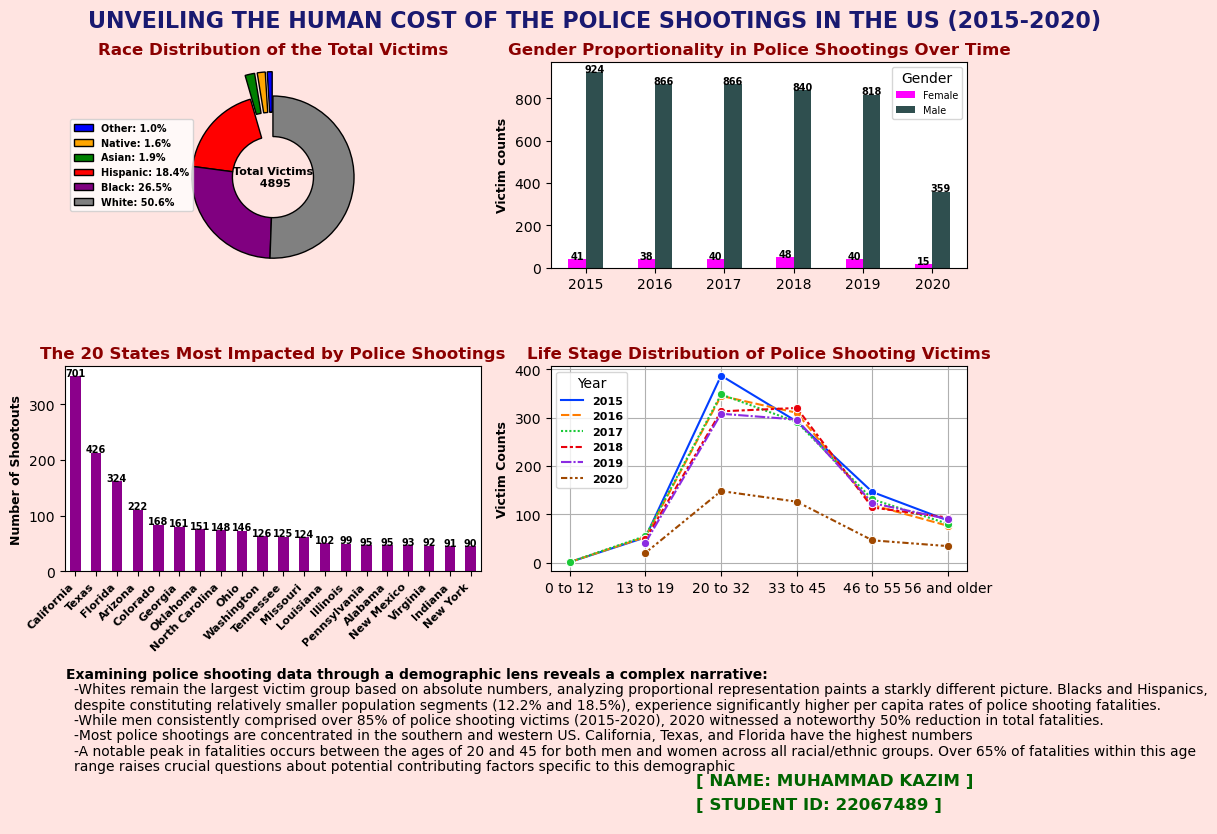

In [4]:
# Importing all the neccessary liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Loading the CSV file into pandas DataFrame

file = pd.read_csv(r"shootings.csv")

# Initial data exploration to check the missing values and summary statistics

file.head()
file.info()
file.describe()
file.isnull().sum()


'''Data cleaning and preparation steps are involved in below codes'''

# Extract year from date column

file["year"] = pd.to_datetime(file["date"]).dt.year
file.year.head()

# Replace gender abbreviations with full names

gender_names = {'M':'Male','F':'Female'}
file['gender'] = file['gender'].replace(gender_names)

# Convert age to integer

file['age'] = file['age'].astype(int)

# Calculate total victim count

total_victims = file.id.count()

# Rename states for better readability

renaming_states = {'WA':'Washington', 'OR':'Oregon', 'KS':'Kansas', 
                   'CA':'California', 'CO':'Colorado', 'OK':'Oklahoma', 
                   'AZ':'Arizona', 'IA':'Iowa', 'PA':'Pennsylvania', 
                   'TX':'Texas', 'OH':'Ohio', 'LA':'Louisiana', 
                   'MT':'Montana', 'UT':'Utah', 'AR':'Arkansas', 
                   'IL':'Illinois', 'NV':'Nevada', 'NM':'New Mexico', 
                   'MN':'Minnesota', 'MO':'Missouri', 'VA':'Virginia', 
                   'NJ':'New Jersey', 'IN':'Indiana', 'KY':'Kentucky', 
                   'MA':'Massachusetts', 'NH':'New Hampshire', 
                   'FL':'Florida', 'ID':'Idaho', 'MD':'Maryland', 
                   'NE':'Nebraska', 'MI':'Michigan', 'GA':'Georgia', 
                   'TN':'Tennessee', 'NC':'North Carolina', 'AK':'Alaska', 
                   'NY':'New York', 'ME':'Maine', 'AL':'Alabama', 
                   'MS':'Mississippi', 'WI':'Wisconsin', 
                   'SC':'South Carolina', 'DE':'Delaware', 
                   'DC':'District of Columbia', 'WV':'West Virginia',
                   'HI':'Hawaii', 'WY':'Wyoming', 'ND':'North Dakota', 
                   'CT':'Connecticut', 'SD':'South Dakota', 'VT':'Vermont', 
                   'RI':'Rhode Island'}

file['state'] = file['state'].replace(renaming_states)

# Create age categories

conditions = [
    (file['age'] <= 12),
    (file['age'] <= 19),
    (file['age'] <= 32),
    (file['age'] <= 45),
    (file['age'] <= 55),
    (file['age'] > 55)
]

labels = ['0 to 12', '13 to 19', '20 to 32', 
          '33 to 45', '46 to 55', '56 and older']
file['Stages 0f Life'] = np.select(conditions, labels, default='Unknown')

''' Counting the victims by the race , 
 and then resets the index to create a new DataFrame with race 
 and count columns.'''

race_count = file.groupby('race')[['id']].count().reset_index()
race_count = race_count.sort_values(by='id', ascending=True)

'''Calculates the percentage of victims for each race group 
and adds a new column to the DataFrame.'''

race_count['percentage'] = round(race_count.id/4895*100, 2)


'''After the data cleaning, we will make the infographics chart 
in the below codes'''

# Create a grid layout for the infographics

fig = plt.figure(figsize=(12, 10), facecolor= 'mistyrose')
gs = gridspec.GridSpec(4, 2, height_ratios=[4, 4, 3, 1])

# Plot 1: Donut chart for race distribution

ax1 = plt.subplot(gs[0, 0])

# Assigning a list of colors to the slices.

colors = ['blue', 'orange', 'green', 'red', 'purple', 'gray']
explode = (0.3, 0.3, 0.3, 0, 0., 0)  # explode the slices

# Extract the race percentage values from the DataFrame

sizes = race_count['percentage']
labels = race_count['race']
wedgeprops = dict(width=0.5, edgecolor='black')

wedges, texts, autotexts = plt.pie(sizes, explode=explode, 
                                   labels=None, colors=colors,
                                   autopct='', startangle=90, 
                                   wedgeprops= wedgeprops)
ax1.set_title('Race Distribution of the Total Victims', 
              fontweight='bold', fontsize=12, color= 'darkred')

ax1.text(0, 0, f"Total Victims\n {total_victims}", 
         ha='center', va='center', fontsize=8, fontweight='bold')

# Draw a circle in the center to create a donut

centre_circle = plt.Circle((0, 0), 0)
fig.gca().add_artist(centre_circle)
ax1.axis('equal')

# Legend for the donut chart Create custom legend with percentage details

legend_labels = [f"{label}: {size:.1f}%" for label, 
                 size in zip(labels, sizes)]
ax1.legend(legend_labels, loc="center left", bbox_to_anchor=(0, 0,0.5, 1), 
           prop={'size': 7, 'weight': 'bold'})

# Plot 2: Bar chart for gender distribution over years

ax2 = plt.subplot(gs[0, 1])
shoot_gender_count = file.groupby(['year', 
                                   'gender']).size().reset_index(name='count')
# Pivot the dataframe for better plotting

pivot_df_1 = shoot_gender_count.pivot(index='year', 
                                      columns='gender', values='count')

# Plotting the bar chart

ax2 = pivot_df_1.plot(kind='bar', 
                      color=['magenta', 'darkslategray'], ax=ax2)

# For getting the values on the top of each bars

for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2, height + 1,
             f'{height}', ha='center', fontsize=7, weight='bold')

# Setting the title, labels, and legend of the bar chart

ax2.legend(title="Gender", loc="upper right",
           prop={'size': 7})
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
ax2.set_yticklabels(ax2.get_yticklabels())
ax2.set_xlabel('')
ax2.set_ylabel("Victim counts", fontweight='bold', fontsize= 9)
ax2.set_title('Gender Proportionality in Police Shootings Over Time', 
              fontweight='bold', fontsize=12, color= 'darkred')

# Plot 3: Bar chart for top 20 states with most shootouts

ax3 = plt.subplot(gs[1, 0])
b_plot = file['state'].value_counts().head(20).plot.bar(color='darkmagenta', 
                                                        ax=ax3)

# For getting the values on the top of each bars

for bar in b_plot.patches:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}', 
             ha='center', fontsize=7, weight='bold')

# Setting the title, labels of the bar chart

ax3.set_title('The 20 States Most Impacted by Police Shootings', 
              fontweight='bold', fontsize=12, color= 'darkred')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', 
                    fontweight='bold',fontsize = 8)
ax3.set_yticklabels(ax3.get_yticklabels())
ax3.set_ylabel("Number of Shootouts", fontweight='bold', fontsize= 9)

# Plot 4: Line chart for distribution of stages of life over years

ax4 = plt.subplot(gs[1,1])
year_counts = file.groupby(['year',
                            'Stages 0f Life']).size().reset_index(name='id')

# Pivot the DataFrame

pivot_df_2 = year_counts.pivot(index='Stages 0f Life',
                               columns='year', values='id')

sns.lineplot(data=pivot_df_2, marker='o',
             palette='bright', ax=ax4)
ax4.set_title('Life Stage Distribution of Police Shooting Victims',
              fontweight='bold', fontsize=12, color= 'darkred')
ax4.set_xlabel('')
ax4.set_ylabel('Victim Counts', fontweight='bold', fontsize= 9)
ax4.legend(title= "Year", loc= "upper left",
           prop={'size': 8, 'weight': 'bold'})
ax4.set_xticklabels(ax4.get_xticklabels())
ax4.set_yticklabels(ax4.get_yticklabels())
ax4.grid()

# Naming the title for the infographic chart

fig.suptitle("UNVEILING THE HUMAN COST OF THE POLICE SHOOTINGS IN THE US (2015-2020)",
             fontsize=16, fontweight='bold', color = 'midnightblue')

ax_text = plt.subplot(gs[2, :])  # Occupy the entire bottom row
ax_text.axis('off')  # Remove axes for a clean text box

# Add 5-6 lines of explanation for the plots, adjusting text as needed

ax_text.text(0.001, 0.95, "Examining police shooting data through a demographic lens reveals a complex narrative:", 
             fontsize=10, fontweight='bold')
ax_text.text(0.01, 0.85, "-Whites remain the largest victim group based on absolute numbers, analyzing proportional representation paints a starkly different picture. Blacks and Hispanics,", 
             fontsize=10)
ax_text.text(0.01, 0.75, "despite constituting relatively smaller population segments (12.2% and 18.5%), experience significantly higher per capita rates of police shooting fatalities.", 
             fontsize=10)
ax_text.text(0.01, 0.65, "-While men consistently comprised over 85% of police shooting victims (2015-2020), 2020 witnessed a noteworthy 50% reduction in total fatalities.", 
             fontsize=10)
ax_text.text(0.01, 0.55, "-Most police shootings are concentrated in the southern and western US. California, Texas, and Florida have the highest numbers", 
             fontsize=10)
ax_text.text(0.01, 0.45, "-A notable peak in fatalities occurs between the ages of 20 and 45 for both men and women across all racial/ethnic groups. Over 65% of fatalities within this age", 
             fontsize=10)
ax_text.text(0.01, 0.35, "range raises crucial questions about potential contributing factors specific to this demographic", 
             fontsize=10)
ax_text.text(0.7, 0.25, "[ NAME: MUHAMMAD KAZIM ] ", 
             fontsize=12, fontweight= 'bold', color= 'darkgreen')
ax_text.text(0.7, 0.10, "[ STUDENT ID: 22067489 ] ", 
             fontsize=12, fontweight= 'bold', color= 'darkgreen')


# Adjust layout and save the infographic
plt.tight_layout()
plt.show()
